In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import datasets, layers, models
import tensorflow as tf
import numpy as np
import os
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()
test_df = pd.read_csv("test.csv")
test_df.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000


In [4]:
train_df.head(10)

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
5,0,-0.526642,-0.590432,0.328210,-0.547433,-0.692556,0.175954,0.539330,0.578212,0.547327,...,1.131889,0.250693,-0.215257,0.236730,0.905414,-0.102015,-2.453250,-1.562715,-0.324501,1.590111
6,0,-0.199279,0.831787,-1.052687,0.491722,-0.571469,-1.449519,-0.227167,0.451431,0.090848,...,1.081787,0.875338,-1.217201,-0.297249,-0.133911,-0.865070,-0.128914,1.153154,0.363864,0.670339
7,0,-0.906233,0.987997,-2.056229,1.078932,0.501608,0.826041,-0.136533,-0.931548,-0.657145,...,1.041859,-0.313667,1.492701,-0.425727,-0.425587,-0.408214,2.041689,0.814182,0.211569,0.343013
8,0,-0.283658,0.964051,-0.349123,-0.162445,0.238172,0.501472,0.413006,-1.183602,-0.221886,...,-1.612677,-0.714356,-0.033445,-2.350722,-1.373337,-1.521727,0.015327,0.114279,1.320421,0.979955
9,0,1.382773,-2.415394,0.969006,-1.690371,1.509442,0.914959,-0.161389,0.952598,-0.044989,...,0.875176,-0.855081,0.318588,0.252447,0.400645,1.732217,-0.390191,0.628386,-1.518295,-0.218986


In [5]:
tf.config.run_functions_eagerly(True)
os.environ["TF_KERAS"]='1'

In [6]:
#preprocessing begins
Train_image=train_df.drop('labels',axis ='columns')
Train_label=train_df['labels']    

In [7]:
Train_label.head()

0    0
1    1
2    1
3    0
4    0
Name: labels, dtype: int64

In [8]:
Train_image=Train_image.to_numpy()
Train_label=Train_label.to_numpy()
Train_reshape_image=Train_image.reshape(-1,20,20,3)

In [9]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_reshape_image,Train_label,test_size=0.25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


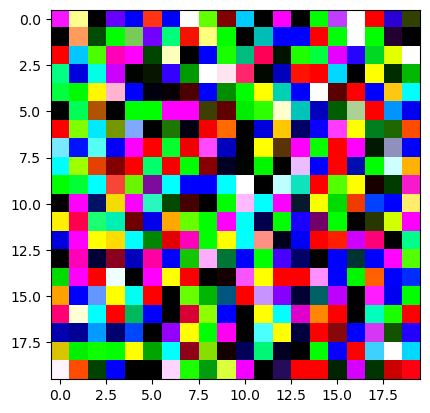

In [10]:
plt.imshow(Xtrain[1])

In [11]:
def model_cnn_func(Xtrain,Xtest,Ytrain,Ytest,acc_mod_no):
    
    
    model_cnn = models.Sequential([
            layers.Conv2D(filters=16,kernel_size=(11,11),activation='leaky_relu',input_shape=(20,20,3),strides=(2,2),use_bias=True),
            layers.Dropout(0.2),
            layers.MaxPool2D((2,2),padding='same'),
            layers.Conv2D(filters=32,kernel_size=(3,3),activation='leaky_relu',use_bias=True),
            layers.MaxPool2D((2,2),padding ='same'), 
    
            layers.Flatten(),
            layers.Dense(64,activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L1(l=0.01)),
            layers.Dropout(0.4),
            layers.Dense(32,activation='leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(16,activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L2(l=0.001)),
            layers.Dropout(0.5),
            layers.Dense(2,activation='softmax')
            ])

    opt =tf.keras.optimizers.Adam(learning_rate=0.0008)

    model_cnn.compile(optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy',]
        )
    model_cnn.fit(Xtrain,Ytrain,epochs=10,verbose=0) 
    accuracy_mod=model_cnn.evaluate(Xtest,Ytest)

    
    if(acc_mod_no==5):
     joblib.dump(model_cnn,"yash.joblib")
    
    
    print(accuracy_mod)
    return(accuracy_mod)

list_optimzer=['SGD','adam','RMSprop','Adadelta','Adamax']
i=0
j=0.01
while i!=5:
    acc=model_cnn_func(list_optimzer[i])
    print(list_optimzer[i])
    print(acc)
    i=i+1


In [33]:
model_cnn = models.Sequential([
        layers.Conv2D(filters=16,kernel_size=(11,11),activation='relu',input_shape=(20,20,3),strides=(2,2),use_bias=True),
        layers.Dropout(0.2),
        layers.MaxPool2D((2,2),padding='same'),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',use_bias=True),
        layers.MaxPool2D((2,2),padding ='same'), 
    
        layers.Flatten(),
        layers.Dense(64,activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L1(l=0.01)),
        layers.Dropout(0.4),
        layers.Dense(32,activation='leaky_relu'),
        layers.Dropout(0.2),
        layers.Dense(16,activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L2(l=0.001)),
        layers.Dropout(0.5),
        layers.Dense(2,activation='softmax')
        ])

opt =tf.keras.optimizers.Adam(learning_rate=0.0008)

model_cnn.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
    )
model_cnn.fit(Xtrain,Ytrain,epochs=10,verbose=2)
accuracy_mod=model_cnn.evaluate(Xtest,Ytest)

Epoch 1/10


C:\Users\yashn\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


124/124 - 5s - loss: 2.3855 - accuracy: 0.7089 - 5s/epoch - 39ms/step
Epoch 2/10
124/124 - 5s - loss: 1.0999 - accuracy: 0.8158 - 5s/epoch - 38ms/step
Epoch 3/10
124/124 - 5s - loss: 0.5292 - accuracy: 0.8534 - 5s/epoch - 39ms/step
Epoch 4/10
124/124 - 5s - loss: 0.3855 - accuracy: 0.8829 - 5s/epoch - 39ms/step
Epoch 5/10
124/124 - 5s - loss: 0.3261 - accuracy: 0.8992 - 5s/epoch - 39ms/step
Epoch 6/10
124/124 - 5s - loss: 0.2918 - accuracy: 0.9177 - 5s/epoch - 39ms/step
Epoch 7/10
124/124 - 5s - loss: 0.2524 - accuracy: 0.9309 - 5s/epoch - 39ms/step
Epoch 8/10
124/124 - 5s - loss: 0.2333 - accuracy: 0.9398 - 5s/epoch - 40ms/step
Epoch 9/10
124/124 - 5s - loss: 0.2217 - accuracy: 0.9398 - 5s/epoch - 40ms/step
Epoch 10/10
124/124 - 5s - loss: 0.1972 - accuracy: 0.9510 - 5s/epoch - 40ms/step
42/42 [==============================] - 1s 12ms/step - loss: 0.4998 - accuracy: 0.8423


model_cnn.fit(Xtrain,Ytrain,epochs=10)
accuracy_mod=model_cnn.evaluate(Xtest,Ytest)

In [34]:
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [35]:
acc_mod=1

for train_index,test_index in kfold.split(Train_reshape_image,Train_label):
    X_train,X_test,Y_train,Y_test=Train_reshape_image[train_index],Train_reshape_image[test_index], \
    Train_label[train_index],Train_label[test_index]
    model_cnn_func(X_train,X_test,Y_train,Y_test,acc_mod)
    acc_mod=acc_mod+1
    
acc_mod=0
    
for train_index,test_index in fold.split(Train_reshape_image,Train_label):
    X_train,X_test,Y_train,Y_test=Train_reshape_image[train_index],Train_reshape_image[test_index], \
    Train_label[train_index],Train_label[test_index]
    model_cnn_func(X_train,X_test,Y_train,Y_test,acc_mod)
    acc_mod=acc_mod+1
    

33/33 [==============================] - 0s 12ms/step - loss: 0.9590 - accuracy: 0.6676
[0.9590301513671875, 0.6676190495491028]
33/33 [==============================] - 0s 13ms/step - loss: 0.9370 - accuracy: 0.6667
[0.9370402693748474, 0.6666666865348816]
33/33 [==============================] - 0s 12ms/step - loss: 0.5578 - accuracy: 0.7990
[0.5577929615974426, 0.799047589302063]
33/33 [==============================] - 0s 12ms/step - loss: 0.0991 - accuracy: 0.9838
[0.09911708533763885, 0.9838095307350159]
33/33 [==============================] - 0s 11ms/step - loss: 0.1410 - accuracy: 0.9781
[0.14104995131492615, 0.9780952334403992]


C:\Users\yashn\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


33/33 [==============================] - 0s 11ms/step - loss: 1.0873 - accuracy: 0.6095
[1.087282657623291, 0.6095238327980042]
33/33 [==============================] - 0s 11ms/step - loss: 1.0051 - accuracy: 0.6600
[1.0050936937332153, 0.6600000262260437]
33/33 [==============================] - 0s 11ms/step - loss: 0.5978 - accuracy: 0.8000
[0.5978174209594727, 0.800000011920929]
33/33 [==============================] - 0s 11ms/step - loss: 0.1170 - accuracy: 0.9848
[0.11704855412244797, 0.9847618937492371]
33/33 [==============================] - 0s 11ms/step - loss: 0.1305 - accuracy: 0.9762
[0.1304897516965866, 0.976190447807312]


In [36]:
model_saved=joblib.load("yash.joblib")
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_reshape_image,Train_label,test_size=0.25)
model_saved.evaluate(Xtest,Ytest)

42/42 [==============================] - 0s 11ms/step - loss: 0.1163 - accuracy: 0.9886


[0.1162702664732933, 0.9885757565498352]

In [37]:
yp=model_cnn.predict(Xtest)
yp[:5]

42/42 [==============================] - 0s 5ms/step


array([[4.7094673e-03, 9.9529052e-01],
       [2.3282696e-03, 9.9767166e-01],
       [1.0000000e+00, 1.1027138e-08],
       [3.4784735e-04, 9.9965215e-01],
       [9.9421245e-01, 5.7875626e-03]], dtype=float32)

In [38]:
yp=yp.flatten()
yp.shape

(2626,)

In [39]:
y_pred=[]
i=0

while i < len(yp)-1 :
    if yp[i] >yp[i+1]:
        y_pred.append(0)
    else:
        y_pred.append(1)
    i=i+2

In [40]:
y_pred[:20]

[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]

In [41]:
Ytest[:20]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [42]:
from sklearn.metrics import f1_score
f1_score=(Ytest,yp)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       961
           1       0.96      0.85      0.90       352

    accuracy                           0.95      1313
   macro avg       0.95      0.92      0.93      1313
weighted avg       0.95      0.95      0.95      1313



Text(95.72222222222221, 0.5, 'Truth')

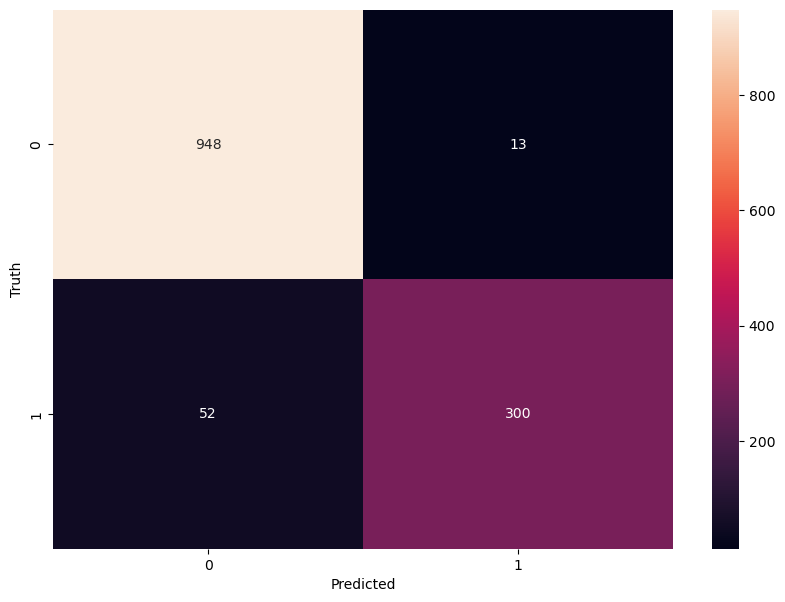

In [44]:
import seaborn as sn
cm =tf.math.confusion_matrix(labels=Ytest,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
test_df_d=test_df.drop('id',axis='columns')
test_df_d

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [46]:
test_df

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,2247,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,2248,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,2249,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [47]:
test_df_d=test_df_d.to_numpy()
test_df_reshaped=test_df_d.reshape(-1,20,20,3)

In [48]:
submission_pred=model_saved.predict(test_df_reshaped)

22/71 [========>.....................] - ETA: 0s

C:\Users\yashn\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


71/71 [==============================] - 0s 5ms/step


In [49]:
sub=np.argmax(submission_pred,axis=1)
sub

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [50]:
submission_data=pd.DataFrame({'id':test_df['id'],'Prediciton':sub})

In [51]:
submission_data.to_csv('yash_output.csv', index=False)

In [52]:
read_sub=pd.read_csv('yash_output.csv')
read_sub

,id,Prediciton
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0
